# 머신러닝 데이터 준비하기
- 데이터가 머신러닝에 미치는 영향은???

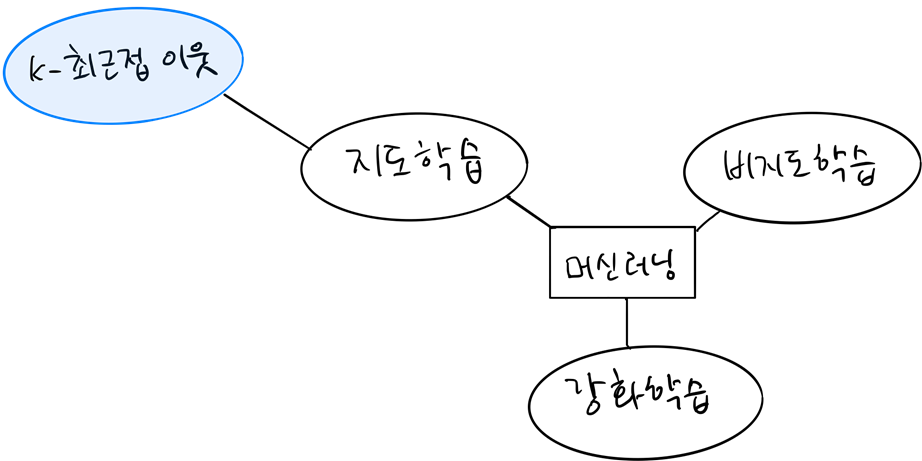
- 지도학습알고리즘
    - 훈련하기 위한 데이터와 정답이 필요
        - 데이터 : 입력, 정답 : 타겟
        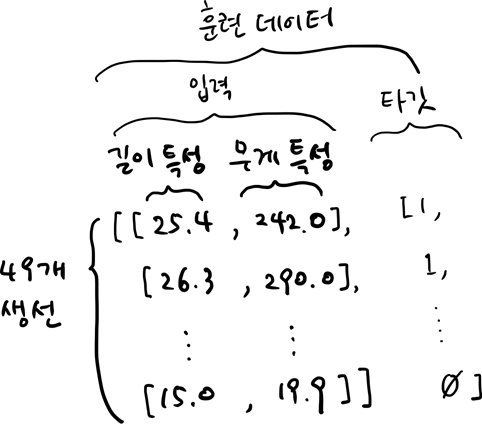
    - 정답을 맞추기 위해 훈련
    
    
- 비지도 학습 알고리즘
    - 무언가를 맞출 수 없음(정답이 없으므로)
    - 데이터를 잘 파악하거나 변형하는데 도움을 줌
    
- 강화 학습
    - 알고리즘이 행동한 결과로 얻은 보상을 사용해 학습
    - 단적인 예로 어떤 데이터를  처음 분류했을 때 도미로 분류해 보상을 10을얻고 두번재 분류했을때는 빙어로 분류해  보상을 2를 얻었다면 강화학습은 이 보상의 결과를 놓고 해당 데이터에 6을 표기
        - 그 후 해당 데이터에 8이라는 수치를 10으로 만들기 위해 알고리즘을 수정해 나가는 방식이 강화학습이다
    - 우리 수업에서는 다루지 않는다

# 훈련 세트와 테스트 세트

### 생선 분류
- 앞의 예에서 훈련데이터에서 도미를 100% 완벽하게 분류함
    - 문제점 : 정답을 미리 알려주고 시험보는 것과 같음    
    
- 훈련한 데이터와 평가에 사용된 데이터가 달라야 함
- 훈련세트 : 훈련에 사용되는 데이터
- 테스트세트 : 테스트에 사용되는 데이터

In [1]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7,
               31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5,
               34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0,
               38.5, 38.5, 39.5, 41.0, 41.0, 
               9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2,
               12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0,
               475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0,
               575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0,
               920.0, 955.0, 925.0, 975.0, 950.0, 
               6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

fish_data = [[l, w] for l, w in zip(fish_length, fish_weight)]
fish_target = [1]*35 + [0]*14

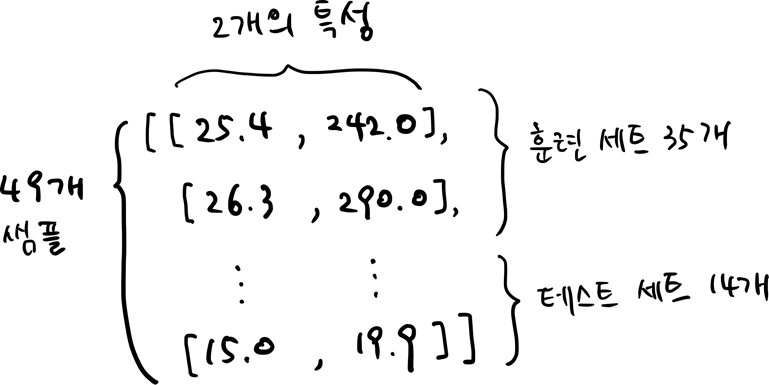

**훈련 데이터셋과 테스트 데이터셋으로 분리**

In [2]:
train_input = fish_data[:35]
train_target = fish_target[:35]

test_input = fish_data[35:]
test_target = fish_target[35:]

- 모델 구성(빈모델 생성)

In [3]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()

- 학습 및 평가

In [4]:
kn.fit(train_input, train_target) # 학습
kn.score(test_input, test_target) # 평가

C:\Users\82102\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.0

### 왜? 성능이 0.0일까?
- 정답을 살펴보자

In [5]:
print(train_target)
print(test_target)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


- 정답 내용을 살펴보면 학습데이터는 1(도미만)와 테스트 데이터는 빙어(0)만 있음

**편향(biased)된 데이터 셋 구성** 때문에

- 샘플링 편향(Sampling Bias)

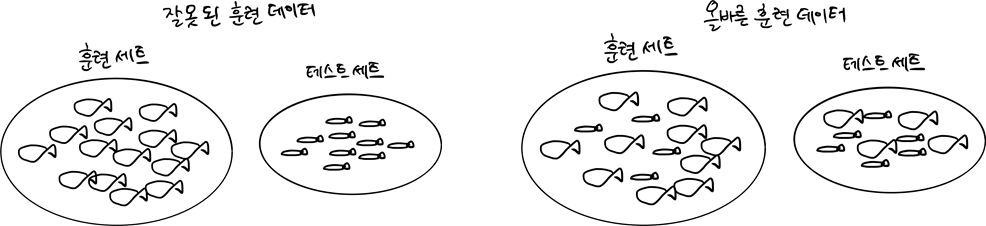

### 올바른 훈련데이터와 테스트데이터 구성하기

In [6]:
import numpy as np

In [7]:
# numpy 배열 사용
input_arr = np.array(fish_data)
target_arr = np.array(fish_target)

In [9]:
# fish_data

In [8]:
print(input_arr)

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]


In [9]:
print(input_arr.shape)

(49, 2)


### 데이터 섞기(shuffling)

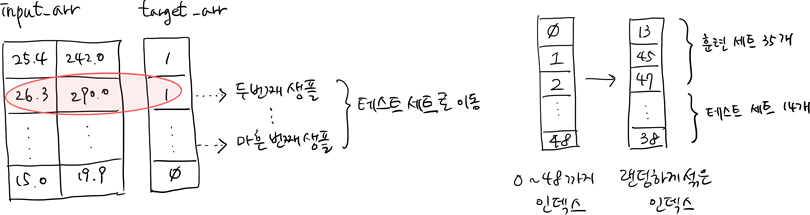

In [10]:
# 실행시마다 동일한 결과를 얻기위해 seed 설정
np.random.seed(42)
index = np.arange(49)
print('suffle 전 : ', index)
np.random.shuffle(index) # shuffle 함수는 원본에 반영됨
print('suffle 후 : ', index)

suffle 전 :  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48]
suffle 후 :  [13 45 47 44 17 27 26 25 31 19 12  4 34  8  3  6 40 41 46 15  9 16 24 33
 30  0 43 32  5 29 11 36  1 21  2 37 35 23 39 10 22 18 48 20  7 42 14 28
 38]


- [참고]: random.seed()
    - 난수를 생성하기 위한 초기값 지정
    - seed를 지정하면 랜덤함수의 결과를 동일하게 재현할 수 있음

In [11]:
print(index)

[13 45 47 44 17 27 26 25 31 19 12  4 34  8  3  6 40 41 46 15  9 16 24 33
 30  0 43 32  5 29 11 36  1 21  2 37 35 23 39 10 22 18 48 20  7 42 14 28
 38]


In [12]:
input_arr[[1,3]]

array([[ 26.3, 290. ],
       [ 29. , 363. ]])

In [13]:
index[:35]
# index[35:]

array([13, 45, 47, 44, 17, 27, 26, 25, 31, 19, 12,  4, 34,  8,  3,  6, 40,
       41, 46, 15,  9, 16, 24, 33, 30,  0, 43, 32,  5, 29, 11, 36,  1, 21,
        2])

In [14]:
train_input = input_arr[index[:35]]
train_target = target_arr[index[:35]]

In [15]:
print(input_arr[13], train_input[0])

[ 32. 340.] [ 32. 340.]


In [16]:
test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]

- 데이터를 섞어서 나누고 다시 확인

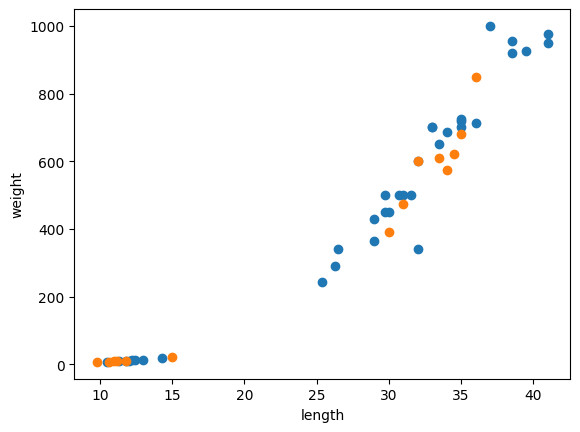

In [17]:
import matplotlib.pyplot as plt
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(test_input[:,0], test_input[:,1])
plt.xlabel('length')
plt.ylabel('weight')
plt.show()
# 데이터과 테스트/트레인에 골고루 분포함

## 두 번째 머신러닝 프로그램

In [18]:
kn.fit(train_input, train_target)

KNeighborsClassifier()

In [19]:
kn.score(test_input, test_target)

C:\Users\82102\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


1.0

In [20]:
print(test_input)

[[ 10.6   7. ]
 [  9.8   6.7]
 [ 35.  680. ]
 [ 11.2   9.8]
 [ 31.  475. ]
 [ 34.5 620. ]
 [ 33.5 610. ]
 [ 15.   19.9]
 [ 34.  575. ]
 [ 30.  390. ]
 [ 11.8   9.9]
 [ 32.  600. ]
 [ 36.  850. ]
 [ 11.    9.7]]


In [21]:
print(test_target)

[0 0 1 0 1 1 1 0 1 1 0 1 1 0]


In [22]:
kn.predict(test_input)

C:\Users\82102\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

## Data Split과 모델 검증

- 언제
    - "충분히 큰" 데이터 세트를 가용할 때
    - "충분히 큰" 데이터가 없을 때에는 교차 확인(Cross Validation) 고려
    

- 왜
    - 학습에 사용되지 않은 데이터를 사용하여 예측을 수행함으로써 모델의 일반적인 성능에 대한 적절한 예측을 함
    

- 어떻게
    - 홀드-아웃(Hold-out)
    - 교차검증(Cross Validation,CV)


### 홀드-아웃 방식
- 데이터를 두 개 세트로 나누어 각각 Train과 Test 세트로 사용
- Train과 Test의 비율을 7:3 ~ 9:1로 널리 사용하나, 알고리즘의 특성 및 상황에 따라 적절한 비율을 사용
- Train – Validation - Test로 나누기도 함

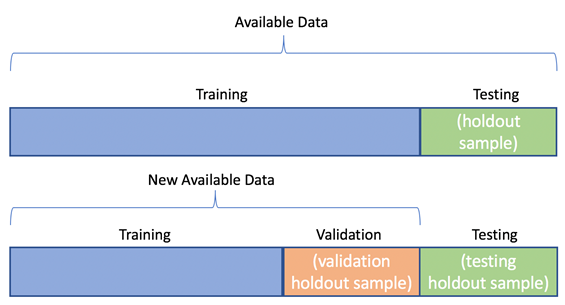
https://algotrading101.com/learn/train-test-split-2/